<a href="https://colab.research.google.com/github/Dheerajtripathi21/node.js/blob/main/Copy_of_MI_projrct_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR



In [19]:
df_passenger = pd.read_csv("/content/large_passenger_flow.csv")
df_traffic = pd.read_csv("/content/large_traffic_data.csv")


In [20]:
df_passenger.head()

,Stop,Time,Day,Passengers
0,Stop A,6:00 AM,Monday,19
1,Stop A,6:00 AM,Monday,79
2,Stop A,6:00 AM,Monday,111
3,Stop A,6:00 AM,Monday,17
4,Stop A,6:00 AM,Monday,95


In [21]:
df_passenger = df_passenger.groupby(['Stop', 'Time', 'Day'], as_index=False).agg({'Passengers': 'mean'})
df_traffic = df_traffic.groupby(['Time', 'Day'], as_index=False).agg({'Traffic Time': 'mean'})

times = sorted(df_passenger['Time'].unique(), key=lambda x: pd.to_datetime(x))
days_of_week = sorted(df_passenger['Day'].unique())

time_map = {time: idx + 1 for idx, time in enumerate(times)}
day_map = {day: idx + 1 for idx, day in enumerate(days_of_week)}

df_passenger['Time Numeric'] = df_passenger['Time'].map(time_map)
df_passenger['Day Numeric'] = df_passenger['Day'].map(day_map)
df_traffic['Time Numeric'] = df_traffic['Time'].map(time_map)
df_traffic['Day Numeric'] = df_traffic['Day'].map(day_map)


In [22]:
# Feature and target data
X_pass = df_passenger[['Time Numeric', 'Day Numeric']]
y_pass = df_passenger['Passengers']

X_traf = df_traffic[['Time Numeric', 'Day Numeric']]
y_traf = df_traffic['Traffic Time']

# Define models
models = {
    "Linear": LinearRegression(),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "SVR": SVR()
}

# Train passenger models
passenger_models = {name: model.fit(X_pass, y_pass) for name, model in models.items()}

# Train traffic models
traffic_models = {name: model.fit(X_traf, y_traf) for name, model in models.items()}


In [23]:
def optimize_schedule(passenger_prediction, traffic_prediction):
    bus_frequency = 'Normal'
    bus_time_adjustment = 0
    if passenger_prediction > 70:
        bus_frequency = '🚍 Increase frequency'
    if traffic_prediction > 30:
        bus_time_adjustment = 10
    return bus_frequency, bus_time_adjustment


def show_summary_visual(day, time, passengers, traffic, action, delay):
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.axis('off')
    ax.set_title(f"🚌 Optimized Schedule – {day}, {time}", fontsize=14, weight='bold', color='darkblue')

    text_lines = [
        f"📅 Day: {day}",
        f"⏰ Time: {time}",
        f"👥 Predicted Passengers: {passengers:.2f}",
        f"🚦 Predicted Traffic: {traffic:.2f} minutes",
        f"✅ Action: {action}",
        f"⏳ Delay Adjustment: {delay} minutes"
    ]

    for i, line in enumerate(text_lines):
        ax.text(0, 1 - i * 0.15, line, fontsize=12, ha='left', va='top', color='black')

    plt.tight_layout()
    plt.show()


In [ ]:

selected_model = "RandomForest"  # Options: "Linear", "RandomForest", "GradientBoosting", "SVR"

user_day = input("Enter Day (e.g., Monday): ").strip()
user_time = input("Enter Time (e.g., 06:00 AM): ").strip()

if user_day in day_map and user_time in time_map:
    time_num = time_map[user_time]
    day_num = day_map[user_day]

    pred_pass = passenger_models[selected_model].predict([[time_num, day_num]])[0]
    pred_traffic = traffic_models[selected_model].predict([[time_num, day_num]])[0]
    opt_freq, opt_delay = optimize_schedule(pred_pass, pred_traffic)

    print("\n" + "="*40)
    print(f"\033[1;44m  🚌 OPTIMIZED WITH {selected_model.upper()}  \033[0m")
    print("="*40)
    print(f"\033[1mDay:\033[0m                {user_day}")
    print(f"\033[1mTime:\033[0m               {user_time}")
    print(f"\033[1mPredicted Passengers:\033[0m  {pred_pass:.2f}")
    print(f"\033[1mPredicted Traffic:\033[0m     {pred_traffic:.2f} minutes")
    print(f"\033[1mAction:\033[0m              {opt_freq}")
    print(f"\033[1mDelay Adjustment:\033[0m     {opt_delay} minutes")
    print("="*40 + "\n")

    show_summary_visual(user_day, user_time, pred_pass, pred_traffic, opt_freq, opt_delay)
else:
    print("\n\033[1;31mInvalid input!\033[0m Please enter correct Day and Time.")


/tmp/ipython-input-2645021387.py:14: UserWarning: Glyph 128652 (\N{BUS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128652 (\N{BUS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


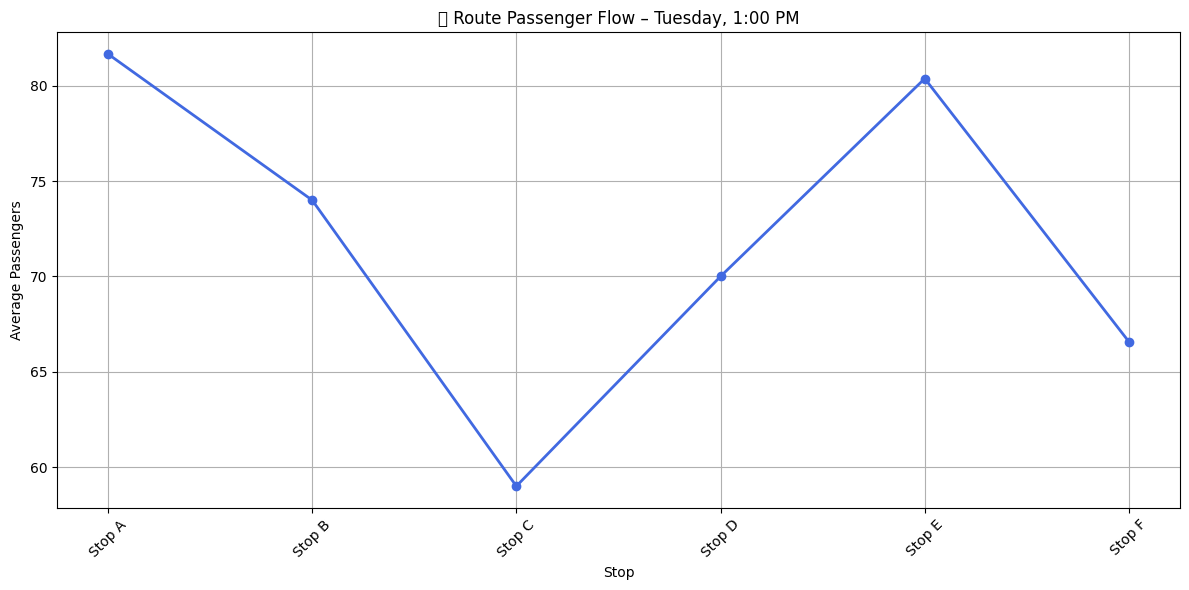

In [12]:
if user_day in day_map and user_time in time_map:
    df_vis = df_passenger[(df_passenger['Day'] == user_day) & (df_passenger['Time'] == user_time)]
    df_route_grouped = df_vis.groupby('Stop')['Passengers'].mean().reset_index()
    df_route_grouped = df_route_grouped.sort_values('Stop')

    plt.figure(figsize=(12, 6))
    plt.plot(df_route_grouped['Stop'], df_route_grouped['Passengers'],
             marker='o', color='royalblue', linestyle='-', linewidth=2)
    plt.title(f"🚌 Route Passenger Flow – {user_day}, {user_time}")
    plt.xlabel("Stop")
    plt.ylabel("Average Passengers")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
